In [2]:
import pandas as pd

df = pd.read_excel(r"C:\Users\ACER\Desktop\GitHub Projects\Bitcoin_news.xlsx")

print(df.head())

                                                guid  \
0  CBMioAFBVV95cUxNZjBOOVhDWEFXX1VpQjdFRV9WcHpwNz...   
1  CBMid0FVX3lxTFBlZEl1RnJweGIzbDdmMlQxeFhEcThnYm...   
2  CBMiuwFBVV95cUxPZ3g2UHE3NDJnWFp0Z2RkLTJ3d0w4U0...   
3  CBMisAFBVV95cUxOVWg4THJYOVV2angxTkpJemltTThMVF...   
4  CBMi4AFBVV95cUxPUk90Rk5ZcXZmUWl6cmJYWDEzOWpZME...   

                                               image  \
0  https://blogger.googleusercontent.com/img/b/R2...   
1  https://images.cointelegraph.com/cdn-cgi/image...   
2  https://247wallst.com/wp-content/uploads/2018/...   
3  https://cdn.sanity.io/images/s3y3vcno/producti...   
4  https://cdn.sanity.io/images/s3y3vcno/producti...   

                                                link  \
0  https://securityboulevard.com/2025/09/attorney...   
1  https://cointelegraph.com/news/capital-group-g...   
2  https://247wallst.com/investing/2025/09/13/cry...   
3  https://www.coindesk.com/markets/2025/09/14/st...   
4  https://www.coindesk.com/markets/2025/09/13

In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Download stopwords if you haven't already
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')
    nltk.download('punkt')

# Assuming 'df' is your DataFrame and 'text' is the column you're working with

# 1. Remove missing rows from the 'title' column
df.dropna(subset=['title'], inplace=True)

# 2. Tokenize the text
df['tokenized_title'] = df['title'].apply(word_tokenize)

# 3. Make every text in the title column lowercase
df['lowercase_title'] = df['title'].str.lower()

# 4. Remove special characters
df['no_special_chars_title'] = df['lowercase_title'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

# 5. Remove stopwords
stop_words = set(stopwords.words('english'))
df['stopwords_removed_title'] = df['no_special_chars_title'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

print(df.head())

                                                guid  \
0  CBMioAFBVV95cUxNZjBOOVhDWEFXX1VpQjdFRV9WcHpwNz...   
1  CBMid0FVX3lxTFBlZEl1RnJweGIzbDdmMlQxeFhEcThnYm...   
2  CBMiuwFBVV95cUxPZ3g2UHE3NDJnWFp0Z2RkLTJ3d0w4U0...   
3  CBMisAFBVV95cUxOVWg4THJYOVV2angxTkpJemltTThMVF...   
4  CBMi4AFBVV95cUxPUk90Rk5ZcXZmUWl6cmJYWDEzOWpZME...   

                                               image  \
0  https://blogger.googleusercontent.com/img/b/R2...   
1  https://images.cointelegraph.com/cdn-cgi/image...   
2  https://247wallst.com/wp-content/uploads/2018/...   
3  https://cdn.sanity.io/images/s3y3vcno/producti...   
4  https://cdn.sanity.io/images/s3y3vcno/producti...   

                                                link  \
0  https://securityboulevard.com/2025/09/attorney...   
1  https://cointelegraph.com/news/capital-group-g...   
2  https://247wallst.com/investing/2025/09/13/cry...   
3  https://www.coindesk.com/markets/2025/09/14/st...   
4  https://www.coindesk.com/markets/2025/09/13

In [6]:
df.to_excel('Bitcoin1.xlsx', index=False)

In [7]:
from textblob import TextBlob

# Perform sentiment analysis
df['sentiment_score'] = df['stopwords_removed_title'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Categorize sentiment
def get_sentiment_category(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['sentiment_score'].apply(get_sentiment_category)

# Save to a new Excel file
df.to_excel('b2.xlsx', index=False)

print("Sentiment analysis complete. File 'sentiment_analysis_results.xlsx' has been created.")
print(df[['stopwords_removed_title', 'sentiment_score', 'sentiment_category']].head())

Sentiment analysis complete. File 'sentiment_analysis_results.xlsx' has been created.
                             stopwords_removed_title  sentiment_score  \
0  attorney generals go bitcoin atms supporting f...         0.250000   
1  investment giant capital groups 1b bet bitcoin...         0.000000   
2  crypto exchange ipos white hot circle bullish ...         0.416667   
3  sticky inflation softer jobs macro headwinds s...         0.000000   
4  feds sept 17 interest rate decision means cryp...         0.000000   

  sentiment_category  
0           Positive  
1            Neutral  
2           Positive  
3            Neutral  
4            Neutral  


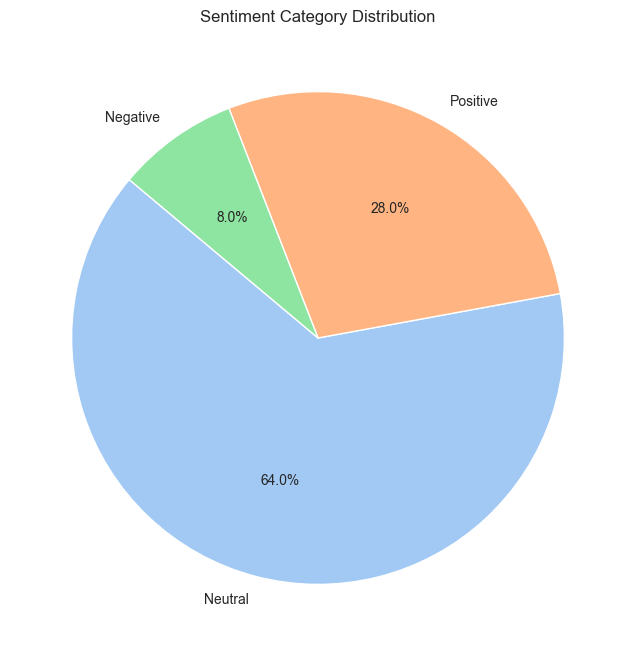

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for a visually appealing plot
sns.set_style("whitegrid")

# Calculate the counts of each sentiment category
sentiment_counts = df['sentiment_category'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Sentiment Category Distribution')
plt.ylabel('') # Hides the 'sentiment_category' label on the y-axis for a cleaner look
plt.show()

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# 1. Vectorize the text data using TF-IDF
# We'll ignore terms that appear in more than 95% of the documents and less than 2 documents.
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = vectorizer.fit_transform(df['stopwords_removed_title'])

# 2. Apply NMF
# We specify 4 topics as requested.
num_topics = 5
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_model.fit(tfidf)

# 3. Display the topics with their top words
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx+1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))

num_top_words = 10
feature_names = vectorizer.get_feature_names_out()
display_topics(nmf_model, feature_names, num_top_words)

# 4. Assign the dominant topic to each document in the DataFrame
topic_results = nmf_model.transform(tfidf)
df['topic'] = topic_results.argmax(axis=1) + 1 # Adding 1 to make topics 1-5 instead of 0-4

print("\nDataFrame with assigned topics:")
print(df[['stopwords_removed_title', 'topic']].head())

Topic 1:
bitcoin 2025 investors stocks surges 14 etfs blackrock treasuries etf
Topic 2:
crypto 2025 best buy xrp singapore finance ethereum magacoin gemini
Topic 3:
btc eth 115k ancient sol doge amid etfs whale spot
Topic 4:
years winklevoss twins bitcoin crypto goes million gemini xrp whale
Topic 5:
price surge market 117k days 115k bitcoin million coin blackrock

DataFrame with assigned topics:
                             stopwords_removed_title  topic
0  attorney generals go bitcoin atms supporting f...      1
1  investment giant capital groups 1b bet bitcoin...      1
2  crypto exchange ipos white hot circle bullish ...      2
3  sticky inflation softer jobs macro headwinds s...      3
4  feds sept 17 interest rate decision means cryp...      2


C:\Users\ACER\AppData\Local\Temp\ipykernel_15044\310969838.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weight', y='word', data=topic_df, palette='viridis')


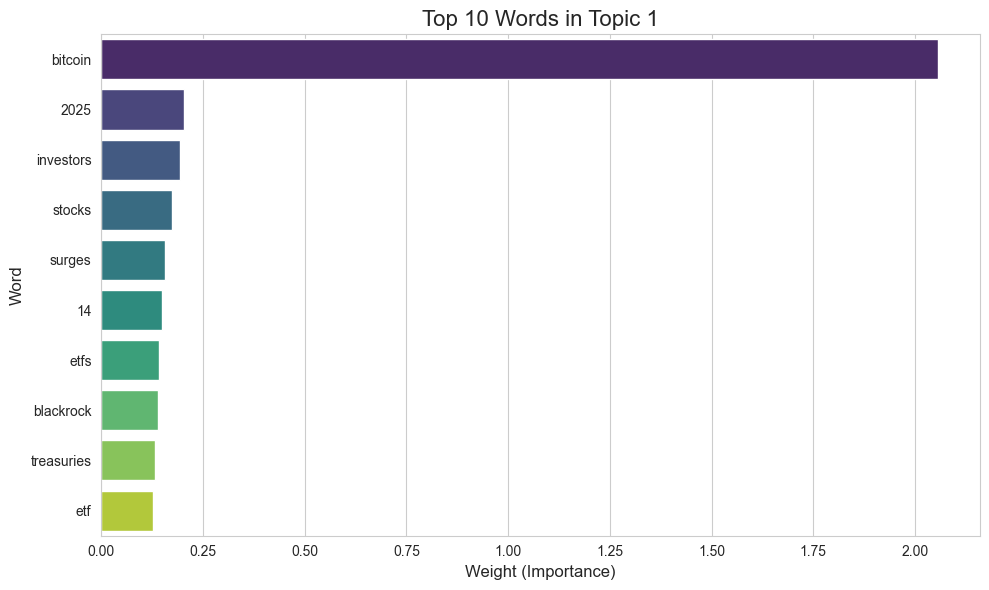

C:\Users\ACER\AppData\Local\Temp\ipykernel_15044\310969838.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weight', y='word', data=topic_df, palette='viridis')


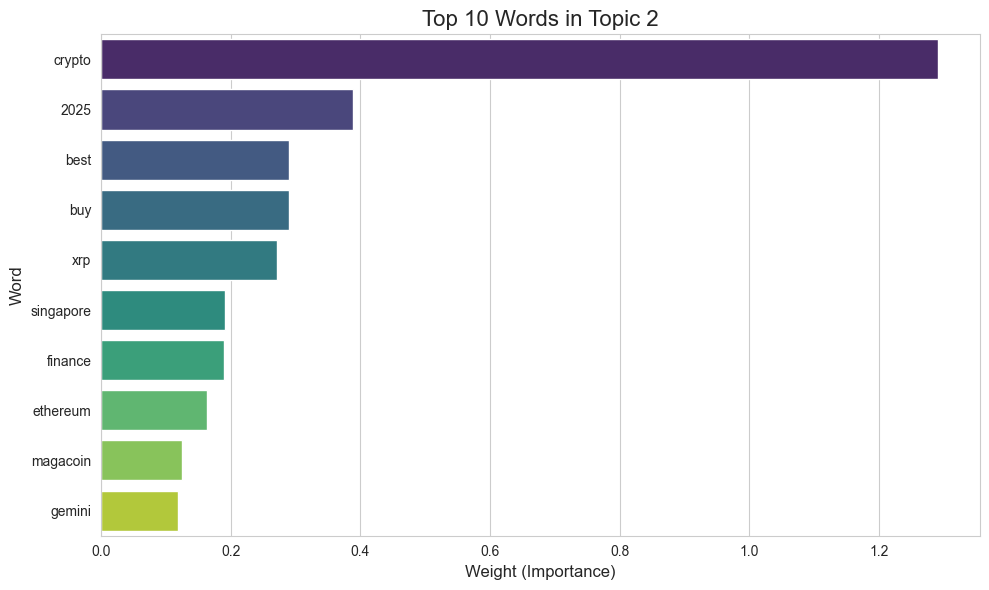

C:\Users\ACER\AppData\Local\Temp\ipykernel_15044\310969838.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weight', y='word', data=topic_df, palette='viridis')


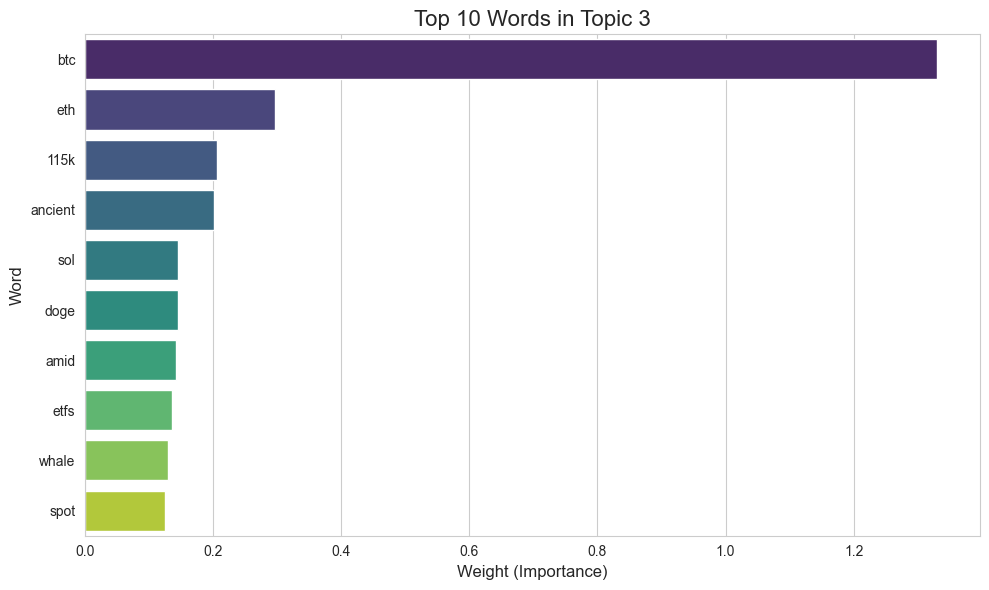

C:\Users\ACER\AppData\Local\Temp\ipykernel_15044\310969838.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weight', y='word', data=topic_df, palette='viridis')


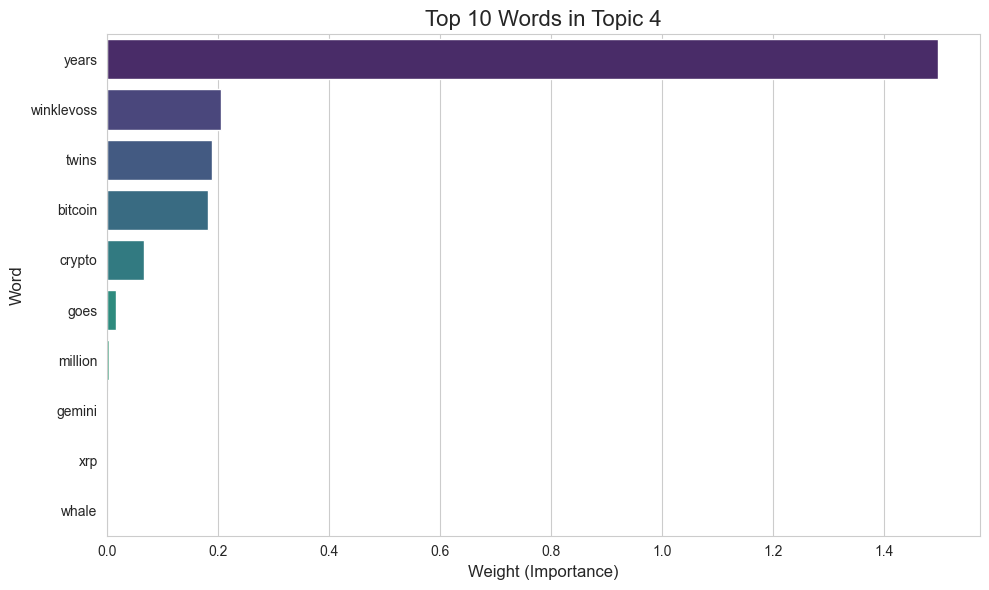

C:\Users\ACER\AppData\Local\Temp\ipykernel_15044\310969838.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weight', y='word', data=topic_df, palette='viridis')


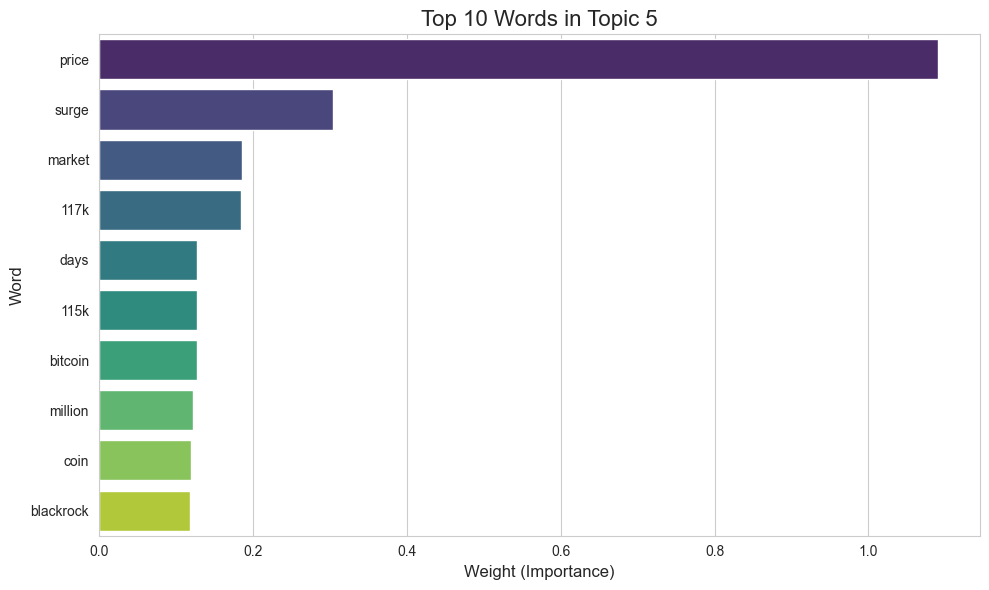

In [12]:
# Get the feature names (words) from the TF-IDF vectorizer
feature_names = vectorizer.get_feature_names_out()
num_top_words = 10

# Loop through each topic and create a bar chart for its top words
for topic_idx, topic in enumerate(nmf_model.components_):
    # Create a DataFrame for the top words in the current topic
    top_words_indices = topic.argsort()[:-num_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_words_indices]
    top_weights = topic[top_words_indices]
    
    topic_df = pd.DataFrame({'word': top_words, 'weight': top_weights})

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x='weight', y='word', data=topic_df, palette='viridis')
    plt.title(f'Top {num_top_words} Words in Topic {topic_idx + 1}', fontsize=16)
    plt.xlabel('Weight (Importance)', fontsize=12)
    plt.ylabel('Word', fontsize=12)
    plt.tight_layout()
    plt.show()

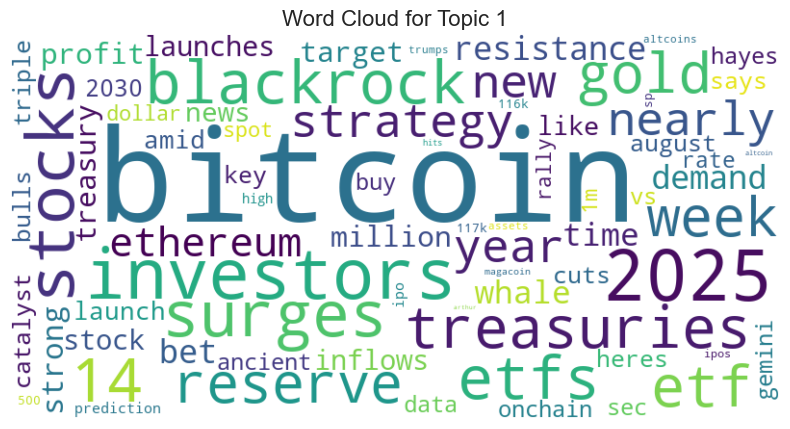

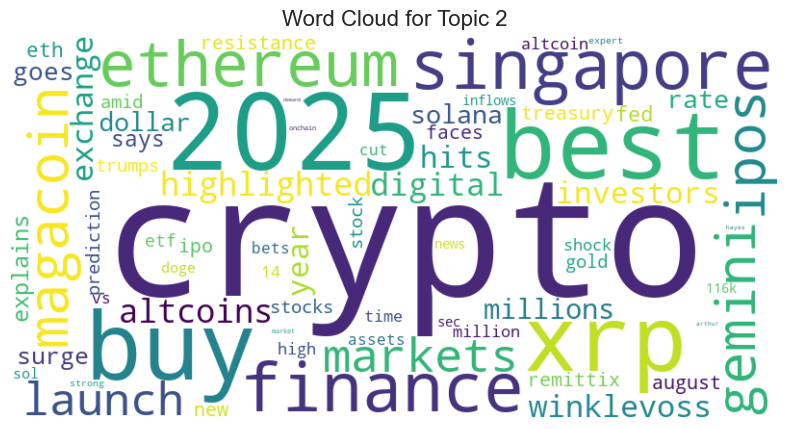

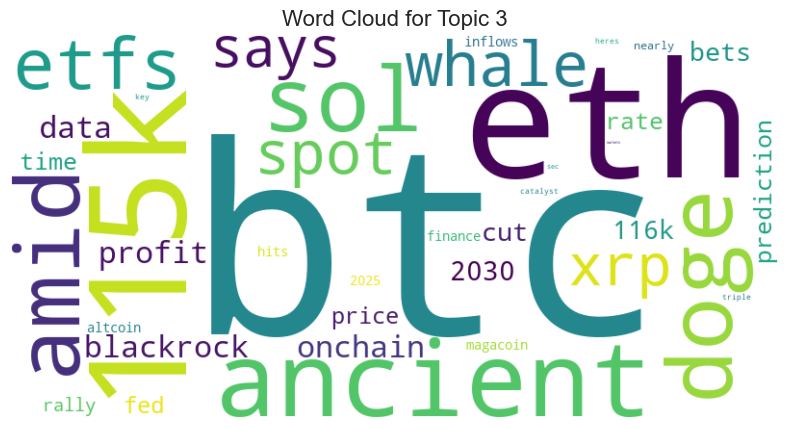

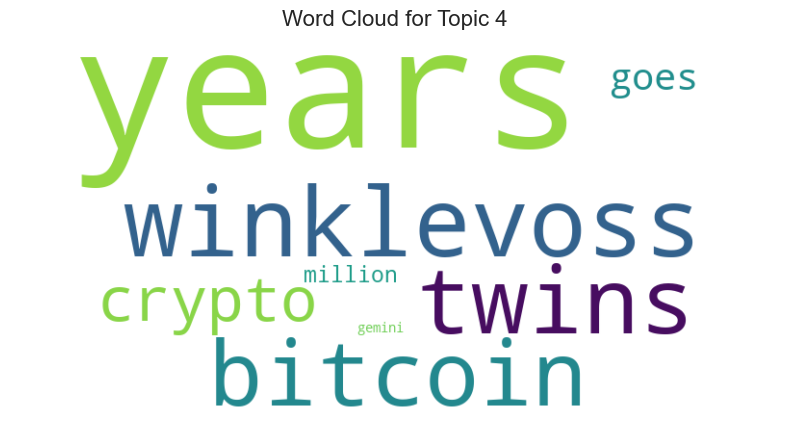

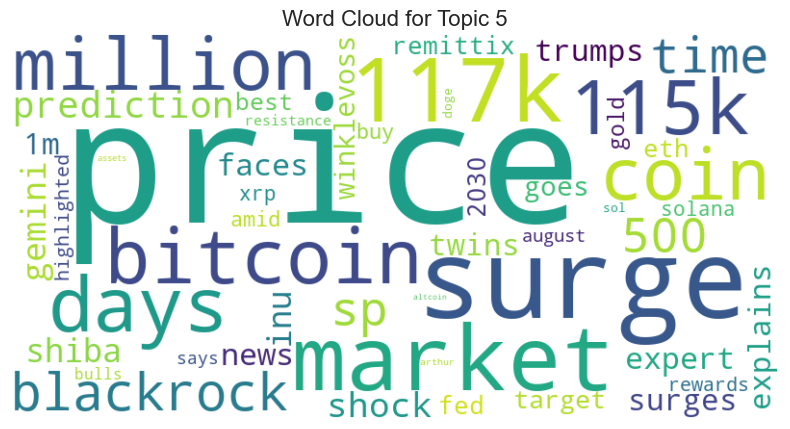

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get the feature names (words) from the TF-IDF vectorizer
feature_names = vectorizer.get_feature_names_out()

# Loop through each topic and create a word cloud
for topic_idx, topic in enumerate(nmf_model.components_):
    # Create a dictionary of words and their weights for the current topic
    topic_words = {feature_names[i]: topic[i] for i in topic.argsort()}
    
    # Create the WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)
    
    # Plotting
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Topic {topic_idx + 1}', fontsize=16)
    plt.axis('off')
    plt.show()

In [14]:
from collections import Counter
import re


# Combine all text into a single list of words, handling potential empty rows
all_words = ' '.join(df['stopwords_removed_title'].dropna()).split()

# --- Bigrams ---
# Generate bigrams manually
bigrams_list = [tuple(all_words[i:i+2]) for i in range(len(all_words)-1)]
# Calculate frequency
bigram_freq = Counter(bigrams_list)

# --- Trigrams ---
# Generate trigrams manually
trigrams_list = [tuple(all_words[i:i+3]) for i in range(len(all_words)-2)]
# Calculate frequency
trigram_freq = Counter(trigrams_list)


# --- Display Results ---
print("--- Bigram Frequencies ---")
# Print the 20 most common bigrams
for bg, freq in bigram_freq.most_common(20):
    print(f"{' '.join(bg)}: {freq}")

print("\n--- Trigram Frequencies ---")
# Print the 20 most common trigrams
for tg, freq in trigram_freq.most_common(20):
    print(f"{' '.join(tg)}: {freq}")

--- Bigram Frequencies ---
bitcoin price: 6
best crypto: 4
bitcoin 5: 3
5 years: 3
crypto buy: 3
fed rate: 3
magacoin finance: 3
bitcoin ethereum: 3
btc price: 3
crypto exchange: 2
price prediction: 2
gemini stock: 2
winklevoss twins: 2
arthur hayes: 2
rate cut: 2
xrp ethereum: 2
eth xrp: 2
sol doge: 2
prediction bitcoin: 2
bitcoin triple: 2

--- Trigram Frequencies ---
bitcoin 5 years: 3
best crypto buy: 3
fed rate cut: 2
prediction bitcoin triple: 2
bitcoin triple 2030: 2
triple 2030 heres: 2
2030 heres key: 2
heres key catalyst: 2
best altcoins buy: 2
price sp 500: 2
attorney generals go: 1
generals go bitcoin: 1
go bitcoin atms: 1
bitcoin atms supporting: 1
atms supporting fraud: 1
supporting fraud investment: 1
fraud investment giant: 1
investment giant capital: 1
giant capital groups: 1
capital groups 1b: 1
